http://nesstar.ess.nsd.uib.no/webview/index.jsp?v=2&submode=abstract&study=http%3A%2F%2F129.177.90.83%3A80%2Fobj%2FfStudy%2FESS6e02.4&mode=documentation&top=yes

https://docs.google.com/presentation/d/1Jr7YXWWu4Wkegx8jBnV6W8j-BTzg1Oypp5b4V0teP3E/edit#slide=id.gbf4aeacc9e_12_5

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Importings

In [5]:
DATASET_PATH = '../datasets/'

df = pd.read_csv(DATASET_PATH + 'df_abt.csv')
df_desc = pd.read_excel('Column descriptions.xlsx')
df_efa = pd.read_csv('EFA_2.csv')

# create dictionary of column name and its description
dict_desc = dict(zip(df_desc['Column Name'], df_desc['Description']))

## Tasks

### How well-being differs based on countries? IN PROGRESS

In [130]:
# rename dataset to description for better understanding of variable
df.rename(columns=dict_desc).head(2)

,Country,"How often socially meet with friends, relatives or colleagues",how many people with whom you can discuss intimate and personal matters,Feeling of safety of walking alone in local area after dark,Subjective general health,Hampered in daily activities by illness/disability/infirmity/mental problem,Take part in social activities compared to others of same age,Respondent or household member victim of burglary/assault last 5 years,"Felt sad, how often past week","felt depressed, how often past week",felt anxious how often past week,"felt everything did as effort, how often past week","sleep was restless, how often past week","could not get going, how often past week","felt lonely, how often past week","interested in what you are doing, how much of the time.","absorbed in what you are doing, how much of the time","enthusiastic about what you are doing, how much of the time",feel appreciated by people you are close to,Little chance to show how capable I am,How satisfied with life as a whole,How happy are you,"Enjoyed life, how often past week","Were happy, how often past week","felt calm and peaceful, how often past week","had lot of energy, how often past week",free to decide how to live my life,feel accomplisment from what I do,feel what I do in life is valueable and worthwhile,always optimistic about my future,there are lots of thing I am good at,in general feel very positive about myself,feel close to the people in local area,feel people in local area help one another,receive help and support from people you are close to,Trust in country's parliament,Trust in the legal system,Trust in the police,Trust in politicians,Trust in political parties,Trust in the European Parliament,Trust in the United Nations,you can't be too careful Most people can be trusted or,Most people try to take advantage of you Most people try to be fair,Most of the time people helpful or mostly looking out for themselves,deal with important problems in life,at times feel as if I am a failure,have a sense of direction in your life,when things go wrong in my life it takes a long time to get back to normal,"Doing last 7 days: unemployed, actively looking for job","Doing last 7 days: unemployed, not actively looking for job",employed
0,Albania,Once a week,3,Very safe,Fair,No,About the same,Less than most,Some of the time,Most of the time,Some of the time,Some of the time,All or almost all of the time,NaN,None or almost none of the time,8,8,8,10,Agree,6,8,Some of the time,Most of the time,Most of the time,Most of the time,Agree strongly,Agree,Agree,Agree strongly,Disagree,Agree,Agree,1,6,0,0,2,0,0,2,2,5,3,0,5,Disagree,3,Disagree,0,0,1
1,Albania,Once a month,1,Unsafe,Good,No,Less than most,Less than most,All or almost all of the time,All or almost all of the time,All or almost all of the time,Some of the time,Most of the time,NaN,All or almost all of the time,10,5,0,10,Agree strongly,0,0,None or almost none of the time,None or almost none of the time,Some of the time,None or almost none of the time,Agree strongly,Agree,Agree strongly,Agree,Agree strongly,Neither agree nor disagree,Neither agree nor disagree,0,6,0,0,10,8,10,10,10,0,88,0,0,Agree,10,Agree,1,0,0


=======> Subjective general health


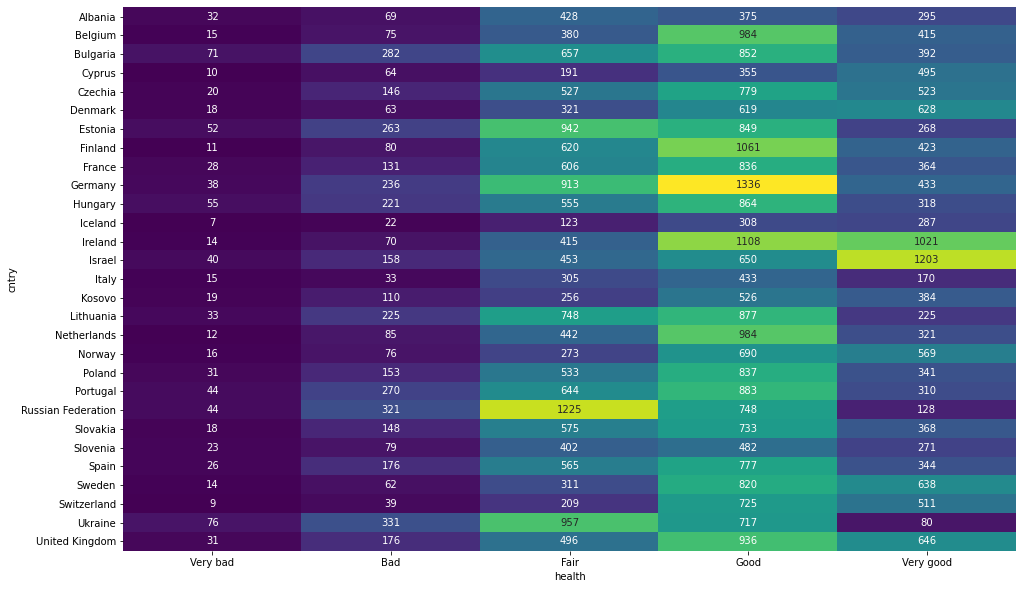

In [152]:
plot_pivot_table(df, 'health', categories=['Very bad', 'Bad', 'Fair', 'Good', 'Very good'], cmap='viridis')

### What is the correlation between trust and well-being? - NOT DONE

In [17]:
df_desc.head()

,Column Name,Description,scale,scale description
0,stflife,How satisfied with life as a whole,0-1-2-3-4-…10,10 extremely satisfied
1,happy,How happy are you,0-1-2-3-4-…10,10 extremely happy
2,fltsd,"Felt sad, how often past week",1-2-3-4,4 most of the time
3,fltdpr,"felt depressed, how often past week",1-2-3-4,4 most of the time
4,enjlf,"Enjoyed life, how often past week",1-2-3-4,4 most of the time


In [26]:
wb_cols = ['stflife', 'happy', 'fltsd', 'fltdpr', 'enjlf', 'wrhpp', 'fltanx', 'fltpcfl',
        'dclvlf', 'lchshcp', 'accdng', 'tmimdng', 'tmabdng', 'tmendng', 'dngval', 'sedirlf', 
        'optftr', 'lotsgot', 'pstvms', 'flrms', 'wrbknrm', 'deaimpp', 'flteeff', 'slprl', 'cldgng', 
        'enrglot', 'ppltrst', 'pplfair', 'pplhlp', 'pplahlp', 'flclpla', 'inprdsc', 'flapppl', 'rehlppl', 
        'fltlnl', 'lchshcp', 'aesfdrk', 'crmvct', 'health', 'hlthhmp', 'sclact', 'sclmeet']
tr_cols = ['trstep', 'trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt', 'trstun']



df = df[wb_cols + tr_cols]

In [44]:
df_desc.head()

,Column Name,Description,scale,scale description
0,stflife,How satisfied with life as a whole,0-1-2-3-4-…10,10 extremely satisfied
1,happy,How happy are you,0-1-2-3-4-…10,10 extremely happy
2,fltsd,"Felt sad, how often past week",1-2-3-4,4 most of the time
3,fltdpr,"felt depressed, how often past week",1-2-3-4,4 most of the time
4,enjlf,"Enjoyed life, how often past week",1-2-3-4,4 most of the time


In [49]:
dict_desc = dict(zip(df_desc['Column Name'], df_desc['Description']))

In [51]:
dict_tr = { col_name: dict_desc[col_name] for col_name in tr_cols }

In [52]:
dict_tr

{'trstep': 'Trust in the European Parliament',
 'trstlgl': 'Trust in the legal system',
 'trstplc': 'Trust in the police',
 'trstplt': 'Trust in politicians',
 'trstprl': "Trust in country's parliament",
 'trstprt': 'Trust in political parties',
 'trstun': 'Trust in the United Nations'}

In [41]:
def percentage_usefull_values(df, col, useless_values = [77, 88, 99]):
    total_lenght = df.shape[0]
    
    usefull_values = [i for i in df[col].values if i not in useless_values]
    print('Usefull values: ', set(usefull_values))
    
    usefull_values_lenght = len(usefull_values)
    print('Percentage of usefull values:', round(usefull_values_lenght / total_lenght * 100, 2))    

In [53]:
for col_name, desc in dict_tr:
    print(desc)
    percentage_usefull_values(df, col_name)
    print('='*60)

ValueError: too many values to unpack (expected 2)

In [42]:
percentage_usefull_values(df, 'trstep')

Usefull values:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Percentage of usefull values: 88.43


In [27]:
df[tr_cols]

,trstep,trstlgl,trstplc,trstplt,trstprl,trstprt,trstun
0,2,0,2,0,0,0,2
1,10,0,10,8,0,10,10
2,8,2,0,0,88,0,5
3,10,7,0,1,1,1,8
4,9,6,7,8,8,7,10
...,...,...,...,...,...,...,...
54668,5,4,3,3,3,4,4
54669,88,8,88,88,7,88,8
54670,5,7,4,6,5,5,6
54671,4,4,2,4,3,3,3


### How employment alter well-being in different countries? - IN PROGRESS

In [113]:
# rename dataset to description for better understanding of variable
df.rename(columns=dict_desc).head(2)

,Country,"How often socially meet with friends, relatives or colleagues",how many people with whom you can discuss intimate and personal matters,Feeling of safety of walking alone in local area after dark,Subjective general health,Hampered in daily activities by illness/disability/infirmity/mental problem,Take part in social activities compared to others of same age,Respondent or household member victim of burglary/assault last 5 years,"Felt sad, how often past week","felt depressed, how often past week",felt anxious how often past week,"felt everything did as effort, how often past week","sleep was restless, how often past week","could not get going, how often past week","felt lonely, how often past week","interested in what you are doing, how much of the time.","absorbed in what you are doing, how much of the time","enthusiastic about what you are doing, how much of the time",feel appreciated by people you are close to,Little chance to show how capable I am,How satisfied with life as a whole,How happy are you,"Enjoyed life, how often past week","Were happy, how often past week","felt calm and peaceful, how often past week","had lot of energy, how often past week",free to decide how to live my life,feel accomplisment from what I do,feel what I do in life is valueable and worthwhile,always optimistic about my future,there are lots of thing I am good at,in general feel very positive about myself,feel close to the people in local area,feel people in local area help one another,receive help and support from people you are close to,Trust in country's parliament,Trust in the legal system,Trust in the police,Trust in politicians,Trust in political parties,Trust in the European Parliament,Trust in the United Nations,you can't be too careful Most people can be trusted or,Most people try to take advantage of you Most people try to be fair,Most of the time people helpful or mostly looking out for themselves,deal with important problems in life,at times feel as if I am a failure,have a sense of direction in your life,when things go wrong in my life it takes a long time to get back to normal,"Doing last 7 days: unemployed, actively looking for job","Doing last 7 days: unemployed, not actively looking for job"
0,Albania,Once a week,3,Very safe,Fair,No,About the same,Less than most,Some of the time,Most of the time,Some of the time,Some of the time,All or almost all of the time,NaN,None or almost none of the time,8,8,8,10,Agree,6,8,Some of the time,Most of the time,Most of the time,Most of the time,Agree strongly,Agree,Agree,Agree strongly,Disagree,Agree,Agree,1,6,0,0,2,0,0,2,2,5,3,0,5,Disagree,3,Disagree,0,0
1,Albania,Once a month,1,Unsafe,Good,No,Less than most,Less than most,All or almost all of the time,All or almost all of the time,All or almost all of the time,Some of the time,Most of the time,NaN,All or almost all of the time,10,5,0,10,Agree strongly,0,0,None or almost none of the time,None or almost none of the time,Some of the time,None or almost none of the time,Agree strongly,Agree,Agree strongly,Agree,Agree strongly,Neither agree nor disagree,Neither agree nor disagree,0,6,0,0,10,8,10,10,10,0,88,0,0,Agree,10,Agree,1,0


In [66]:
df.head(2)

,cntry,sclmeet,inprdsc,aesfdrk,health,hlthhmp,sclact,crmvct,fltsd,fltdpr,fltanx,flteeff,slprl,cldgng,fltlnl,tmimdng,tmabdng,tmendng,flapppl,lchshcp,stflife,happy,enjlf,wrhpp,fltpcfl,enrglot,dclvlf,accdng,dngval,optftr,lotsgot,pstvms,flclpla,pplahlp,rehlppl,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,ppltrst,pplfair,pplhlp,deaimpp,flrms,sedirlf,wrbknrm,uempla,uempli
0,Albania,Once a week,3,Very safe,Fair,No,About the same,Less than most,Some of the time,Most of the time,Some of the time,Some of the time,All or almost all of the time,NaN,None or almost none of the time,8,8,8,10,Agree,6,8,Some of the time,Most of the time,Most of the time,Most of the time,Agree strongly,Agree,Agree,Agree strongly,Disagree,Agree,Agree,1,6,0,0,2,0,0,2,2,5,3,0,5,Disagree,3,Disagree,0,0
1,Albania,Once a month,1,Unsafe,Good,No,Less than most,Less than most,All or almost all of the time,All or almost all of the time,All or almost all of the time,Some of the time,Most of the time,NaN,All or almost all of the time,10,5,0,10,Agree strongly,0,0,None or almost none of the time,None or almost none of the time,Some of the time,None or almost none of the time,Agree strongly,Agree,Agree strongly,Agree,Agree strongly,Neither agree nor disagree,Neither agree nor disagree,0,6,0,0,10,8,10,10,10,0,88,0,0,Agree,10,Agree,1,0


In [125]:
# employed if not unenployed in both variables
df['employed'] = np.where(df['uempla'] + df['uempli'] == 0, 1, 0)

In [143]:
def plot_pivot_table(data, column, index='cntry', values=None, dict_desc=dict_desc,
                     categories=None, figsize=(16, 10), cmap='coolwarm_r'):                    
    
    '''Create pivot table of country by well-being dimension and aggregated by the sum of employed
    '''
    
    print('=======>', dict_desc[column]) # description of column
        
    if categories:
        data[column] = pd.Categorical(df[column], categories, ordered=True) # categorize variables
            
    if values:
        data = pd.pivot_table(data=data, values=values, columns=column, index=index, aggfunc='sum') # create pivot table
    else:
        data = pd.crosstab(data[index], data[column])
       
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=True, cbar=False, cmap=cmap, fmt='g') # heatmap of pivot table
    plt.show()

=======> Subjective general health


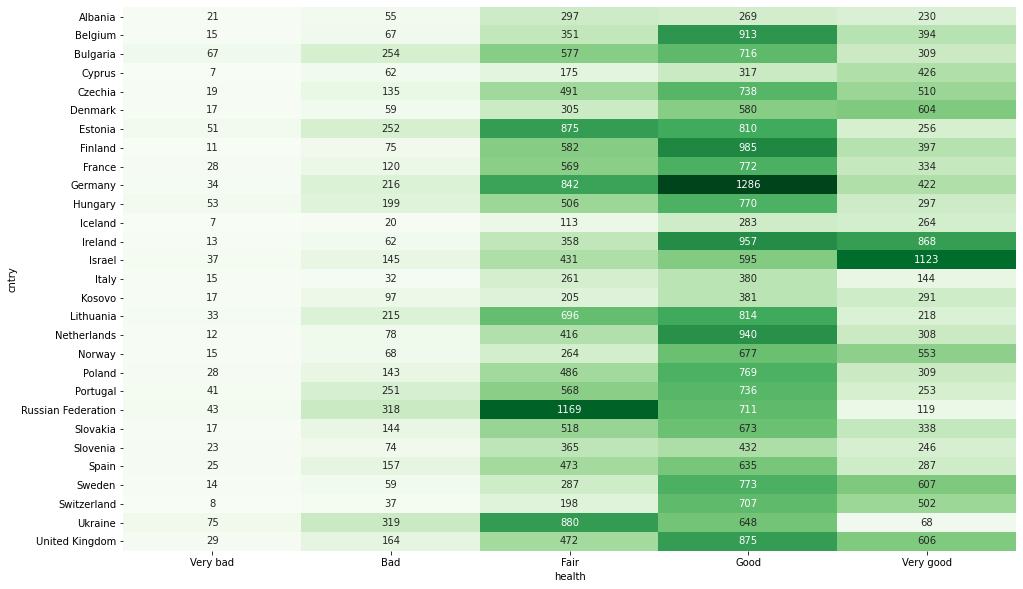

In [134]:
plot_pivot_table(df, 'health', values='employed', categories=['Very bad', 'Bad', 'Fair', 'Good', 'Very good'], cmap='Greens')

=======> Felt sad, how often past week


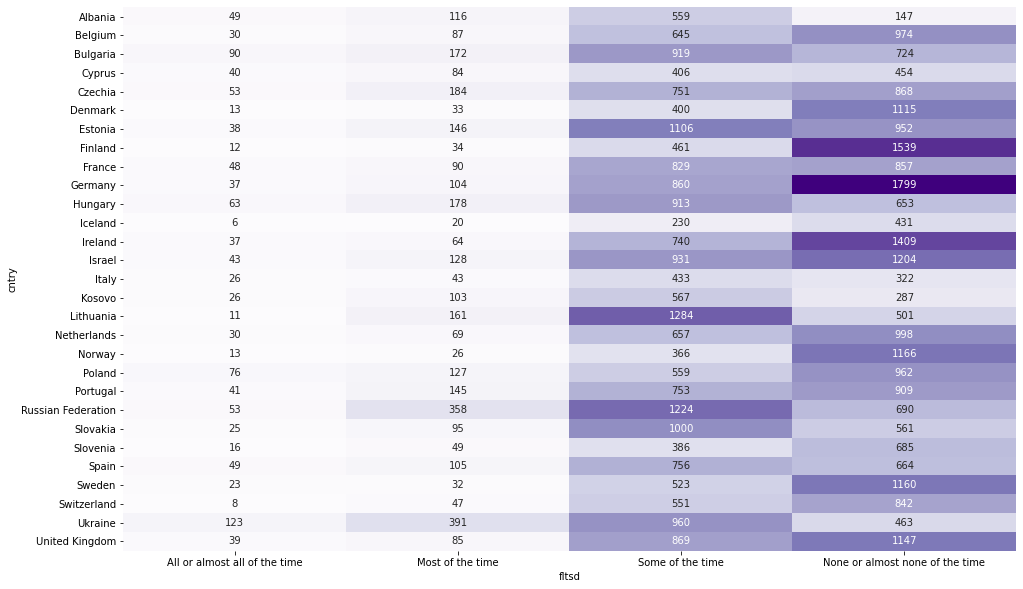

In [129]:
plot_pivot_table(df, 'fltsd', values='employed', categories=['All or almost all of the time','Most of the time', 'Some of the time',
                                          'None or almost none of the time'], cmap='Purples')

## Vega plots

- Datapreps for creating dataframe for vega / vega-lite

### Trust aspects

In [7]:
df_desc.head()

,Column Name,Description,scale,scale description
0,stflife,How satisfied with life as a whole,0-1-2-3-4-…10,10 extremely satisfied
1,happy,How happy are you,0-1-2-3-4-…10,10 extremely happy
2,fltsd,"Felt sad, how often past week",1-2-3-4,4 most of the time
3,fltdpr,"felt depressed, how often past week",1-2-3-4,4 most of the time
4,enjlf,"Enjoyed life, how often past week",1-2-3-4,4 most of the time


In [6]:
trust_cols = [i for i in df_desc['Description'] if 'trust in' in i.lower()]

In [7]:
trust_cols = df_desc[df_desc['Description'].isin(trust_cols)]['Column Name'].tolist()

In [8]:
trust_dict = df_desc.loc[df_desc['Column Name'].isin(trust_cols)].set_index('Column Name')['Description'].to_dict()

In [9]:
df_trust = df[trust_cols].rename(columns=trust_dict)

In [10]:
df_trust = df_trust.stack().to_frame().reset_index().drop(columns=['level_0'])

In [11]:
df_trust.columns = ['Trust', 'Values']

In [12]:
df_trust.head()

,Trust,Values
0,Trust in the European Parliament,2
1,Trust in the legal system,0
2,Trust in the police,2
3,Trust in politicians,0
4,Trust in country's parliament,0


In [13]:
df_trust = df_trust[~df_trust['Values'].isin(['77', '88', '99'])]

In [14]:
df_trust['Values'].unique()

array([ 2,  0, 10,  8,  5,  7,  1,  9,  6,  4,  3], dtype=int64)

In [129]:
df_trust.to_csv('datasets/trust_aspects.csv')

**Gist can be found at:** https://gist.github.com/ossamum/94a10bec61d48e0263b026957539ac17

### Happiness by country

In [15]:
df_country = df[['cntry', 'happy']].copy()

In [16]:
df_country = df_country[df_country['happy'] <= 10]

In [17]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [166]:
longitude = []
latitude = []
   
# function to find the coordinate of a given city 
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
  

In [167]:
countries = df_country['cntry'].unique().tolist()

In [156]:
for i in tqdm(countries):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:46<00:00,  1.60s/it]


In [159]:
df_country_latlon = pd.DataFrame({'cntry': countries,
                                  'latitude': latitude,
                                  'longitude': longitude})

In [198]:
df_country = pd.merge(df_country, df_country_latlon)
df_country.head()

,cntry,happy,latitude,longitude
0,Albania,8,41.000028,19.999962
1,Albania,0,41.000028,19.999962
2,Albania,5,41.000028,19.999962
3,Albania,4,41.000028,19.999962
4,Albania,7,41.000028,19.999962


In [202]:
df_country.groupby(['cntry', 'latitude', 'longitude'],
                   as_index=False)['happy'].mean().to_csv('datasets/country_happiness.csv', index=False)